In [3]:
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt

In [4]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4], bipartite=0)
G.add_nodes_from([5,6,7,8], bipartite=1)

In [5]:
G.add_edges_from([(1,5),(1,7),(1,8)])
G.add_edges_from([(2,6),(2,7),(2,8)])
G.add_edges_from([(3,5)])
G.add_edges_from([(4,8),(4,7)])

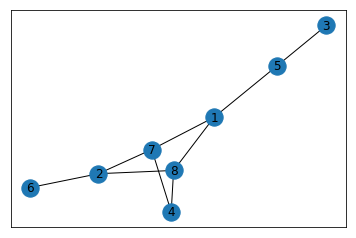

In [6]:
nx.draw_networkx(G)

In [7]:
nx.is_bipartite(G)

True

In [8]:
X, Y = bipartite.sets(G)

In [9]:
print(X)
print(Y)

{1, 2, 3, 4}
{8, 5, 6, 7}


## Create position dictionary for drawing bipartite sets

In [10]:
[(n, (1, i)) for i, n in enumerate(X)]

[(1, (1, 0)), (2, (1, 1)), (3, (1, 2)), (4, (1, 3))]

In [11]:
[(n, (2, i)) for i, n in enumerate(Y)]

[(8, (2, 0)), (5, (2, 1)), (6, (2, 2)), (7, (2, 3))]

In [12]:
pos =dict([(n, (2, i)) for i, n in enumerate(Y)] + [(n, (1, i)) for i, n in enumerate(X)])
# n: node value
# i: node location derived from enumerate iter
#pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
#pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

In [13]:
pos

{8: (2, 0),
 5: (2, 1),
 6: (2, 2),
 7: (2, 3),
 1: (1, 0),
 2: (1, 1),
 3: (1, 2),
 4: (1, 3)}

### now draw the graph and pass the postision dict

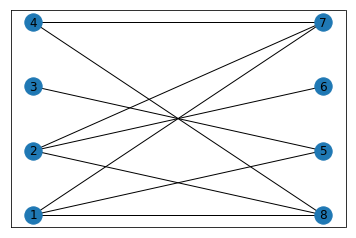

In [14]:
nx.draw_networkx(G,pos=pos)

### add color

create a color map list
    test if node from G is in bipartite set X, return red if true
    else return blue 

then use the color map list in the draw_networkx function

In [35]:
color_map = [ "red" if n in X else "blue" for n in G.nodes()]

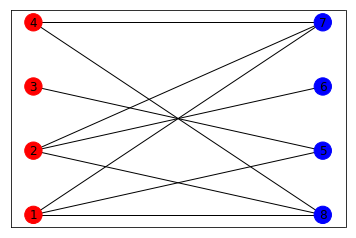

In [36]:
nx.draw_networkx(G,pos=pos,node_color=color_map)